In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data/df_cleaned.csv', index_col=0, parse_dates=['created_at', 'launched_at', 'deadline', 'state_changed_at'])

In [3]:
df.head()

,backers_count,blurb,country,country_displayable_name,created_at,currency,currency_symbol,deadline,disable_communication,goal,...,state,state_changed_at,static_usd_rate,usd_pledged,main_cat,sub_cat,loc_name,loc_state,creator_id,creator_name
0,31,Authenticate and certificate collectible gamin...,SE,Sweden,2017-04-11 01:28:29,SEK,kr,2017-12-24 05:00:00,False,375000.0,...,canceled,2017-12-19 08:47:25,0.118612,2963.986522,games,Gaming Hardware,Uppsala,Uppsala,1984360892,Felipe Garcia
1,39,The latest in Deadiron heavy metal! Help us fu...,US,the United States,2013-05-23 12:23:41,USD,$,2013-08-31 20:59:00,False,1000.0,...,successful,2013-08-31 20:59:02,1.000000,3485.000000,music,Metal,Cleveland Heights,OH,1340525642,Deadiron
2,42,Lindsey Holland Debut Vocal Disc with the Litt...,US,the United States,2013-08-16 08:13:59,USD,$,2013-10-22 19:58:57,False,3500.0,...,successful,2013-10-22 19:58:58,1.000000,3575.000000,music,Jazz,Buffalo,NY,1679924770,Rick Holland
3,21,Whales are washing up around the world with de...,US,the United States,2018-07-10 13:38:49,USD,$,2018-09-03 14:00:00,False,5500.0,...,successful,2018-09-03 14:00:00,1.000000,5523.000000,art,Mixed Media,Manhattan,NY,673151337,"Julia ""Jelly"" Morrison"
4,1,Spirited and talented crooner personality reac...,US,the United States,2013-04-28 20:31:00,USD,$,2013-07-05 14:43:05,False,9000.0,...,failed,2013-07-05 14:43:07,1.000000,100.000000,music,Jazz,Hollywood,CA,2018121664,John Eric Booth


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205227 entries, 0 to 205226
Data columns (total 27 columns):
backers_count               205227 non-null int64
blurb                       205219 non-null object
country                     205227 non-null object
country_displayable_name    205227 non-null object
created_at                  205227 non-null datetime64[ns]
currency                    205227 non-null object
currency_symbol             205227 non-null object
deadline                    205227 non-null datetime64[ns]
disable_communication       205227 non-null bool
goal                        205227 non-null float64
id                          205227 non-null int64
is_starrable                205227 non-null bool
launched_at                 205227 non-null datetime64[ns]
name                        205227 non-null object
pledged                     205227 non-null float64
spotlight                   205227 non-null bool
staff_pick                  205227 non-null bool
state 

# Plot 1: States distribution 

In [5]:
# Check state distribution
df.state.value_counts()

successful    116127
failed         72637
canceled        8531
live            7303
suspended        629
Name: state, dtype: int64

Text(0, 0.5, 'Project numbers (2009-2019)')

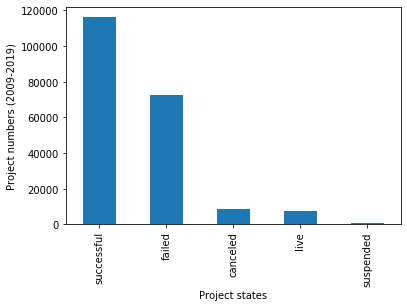

In [6]:
# Draw bar chart to show state distribution
df.state.value_counts().plot(kind='bar')
plt.xlabel('Project states')
plt.ylabel('Project numbers (2009-2019)')

Figure 1. Project states distribution histgram

From the state distribution histgram, we can see there are more projects successful compared to failure, and canceled, suspended and live project were much smaller compared to finished projects considering we included projects for five years, and most projects only last for 1 month or 2 month. Also there are 11k successful projects and 7k failure projects, which provide enough entries for our analysis and train models.

# Plot 2: Project number over launched time

In [7]:
df_sf = df[np.logical_or(df.state == 'successful',df.state == 'failed')].copy()

In [8]:
df_sf.head()

,backers_count,blurb,country,country_displayable_name,created_at,currency,currency_symbol,deadline,disable_communication,goal,...,state,state_changed_at,static_usd_rate,usd_pledged,main_cat,sub_cat,loc_name,loc_state,creator_id,creator_name
1,39,The latest in Deadiron heavy metal! Help us fu...,US,the United States,2013-05-23 12:23:41,USD,$,2013-08-31 20:59:00,False,1000.0,...,successful,2013-08-31 20:59:02,1.0,3485.0,music,Metal,Cleveland Heights,OH,1340525642,Deadiron
2,42,Lindsey Holland Debut Vocal Disc with the Litt...,US,the United States,2013-08-16 08:13:59,USD,$,2013-10-22 19:58:57,False,3500.0,...,successful,2013-10-22 19:58:58,1.0,3575.0,music,Jazz,Buffalo,NY,1679924770,Rick Holland
3,21,Whales are washing up around the world with de...,US,the United States,2018-07-10 13:38:49,USD,$,2018-09-03 14:00:00,False,5500.0,...,successful,2018-09-03 14:00:00,1.0,5523.0,art,Mixed Media,Manhattan,NY,673151337,"Julia ""Jelly"" Morrison"
4,1,Spirited and talented crooner personality reac...,US,the United States,2013-04-28 20:31:00,USD,$,2013-07-05 14:43:05,False,9000.0,...,failed,2013-07-05 14:43:07,1.0,100.0,music,Jazz,Hollywood,CA,2018121664,John Eric Booth
5,1,I am creating what I believe to be a different...,US,the United States,2015-05-01 12:02:46,USD,$,2015-06-06 13:21:57,False,15000.0,...,failed,2015-06-06 13:22:01,1.0,50.0,publishing,Academic,Los Angeles,CA,196191331,Jonathan Giambra


In [9]:
df_by_month = pd.DataFrame(df.groupby([df.launched_at.dt.strftime('%Y-%m'), df.state])['name'].count())
df_by_month.index.names = ['date', 'state']
df_by_month.head()

name
date    state           
2009-04 failed         1
        successful     4
2009-05 failed         3
        successful     9
2009-06 successful     5

In [10]:
df_by_month = df_by_month.unstack(1, fill_value=0)
df_by_month.head()

name                                 
state   canceled failed live successful suspended
date                                             
2009-04        0      1    0          4         0
2009-05        0      3    0          9         0
2009-06        0      0    0          5         0
2009-07        0      1    0          8         0
2009-08        2      3    0         11         0

In [11]:
df_by_month.columns = df_by_month.columns.droplevel()
df_by_month['total'] = df_by_month.canceled + df_by_month.failed + df_by_month.live + df_by_month.successful
df_by_month.head()

state,canceled,failed,live,successful,suspended,total
date,,,,,,
2009-04,0,1,0,4,0,5
2009-05,0,3,0,9,0,12
2009-06,0,0,0,5,0,5
2009-07,0,1,0,8,0,9
2009-08,2,3,0,11,0,16


In [12]:
np.where(df_by_month.index == '2014-07')

(array([63], dtype=int64),)

Text(0, 0.5, 'project counts')

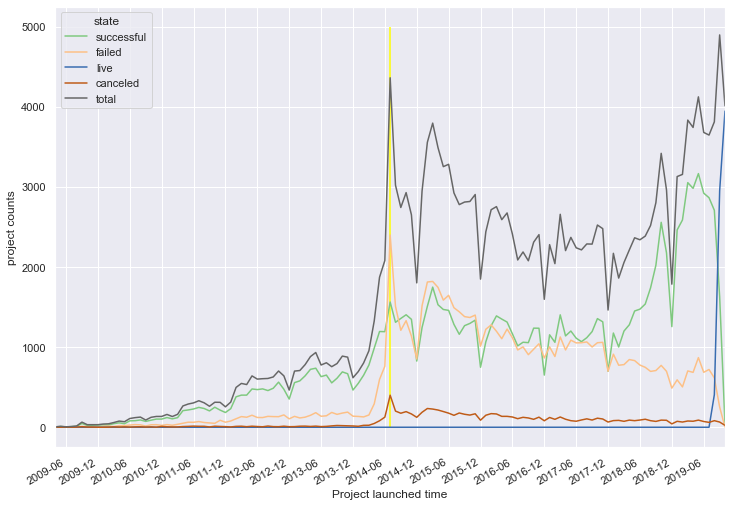

In [13]:
sns.set()
l = len(df_by_month)
fig, ax = plt.subplots(figsize=(12,9))
df_by_month.loc[:,['successful', 'failed', 'live', 'canceled', 'total']].plot(ax=ax, xticks=np.arange(2,l,6), cmap='Accent')
fig.autofmt_xdate()
plt.vlines(63, 0, 5000, color='yellow')
plt.xlabel('Project launched time')
plt.ylabel('project counts')

Figure 2. Time series graph with project counts with different states

From Figure 2, we notice a few interesting patterns for the project launch time series. 1) There is a clear project counts increase around July of 2014 (labeled by yellow line). We couldn't find record of what happened to kickstarter website that month, but our suspicion is there was a large promotion that largely increase their traffic. It can also be seen that the successful project number and failed project number both showed a peak at this month, but it's more obvious for the failed case than successful. This indicate although the promotion at that month boost website traffic, it sacrifice success rate a bit at the same time. 2) There's clear cycle pattern with project counts, each December launched project will show a clear drop, while at the start of year project number increase significantly, and peak around June or July. This pattern is clearer to total and successful project counts, and can still be seen in failed counts. 

Text(0, 0.5, 'project counts')

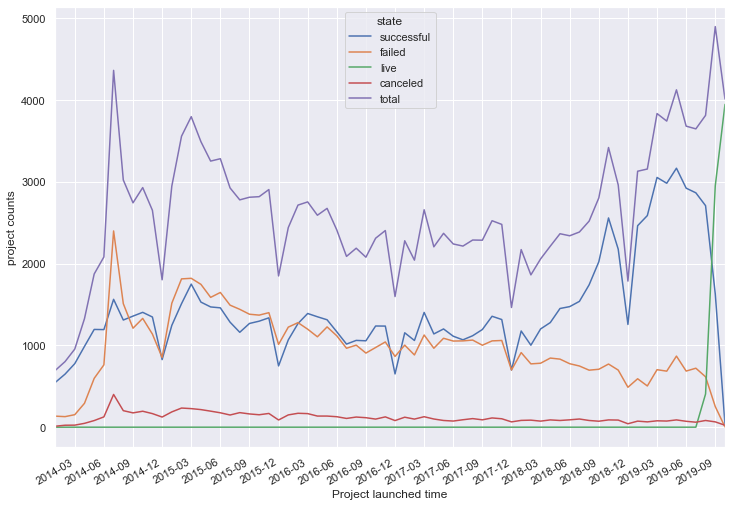

In [18]:
df_p = df_by_month.loc['2014-01':,['successful', 'failed', 'live', 'canceled', 'total']]
l = len(df_p)
fig, ax = plt.subplots(figsize=(12,9))
df_p.loc['2014-01':,:].plot(ax=ax, xticks=np.arange(2,l,3))
fig.autofmt_xdate()
plt.xlabel('Project launched time')
plt.ylabel('project counts')

# Plot 4: Seccuss project ratio over time 

In [19]:
df_by_month['success_ratio'] = df_by_month.successful / df_by_month.total

In [20]:
df_lppm = pd.DataFrame(df_sf.groupby([df_sf.launched_at.dt.strftime('%Y-%m'), 'state']).usd_pledged.sum())
df_lppm = df_lppm.unstack(1,fill_value=0)
df_lppm.columns = df_lppm.columns.droplevel(0)
df_lppm['total'] = df_lppm.failed + df_lppm.successful
df_lppm.head()

state,failed,successful,total
launched_at,,,
2009-04,41.0,7559.00,7600.00
2009-05,365.0,30770.18,31135.18
2009-06,0.0,6637.89,6637.89
2009-07,150.0,19425.73,19575.73
2009-08,320.0,74889.13,75209.13


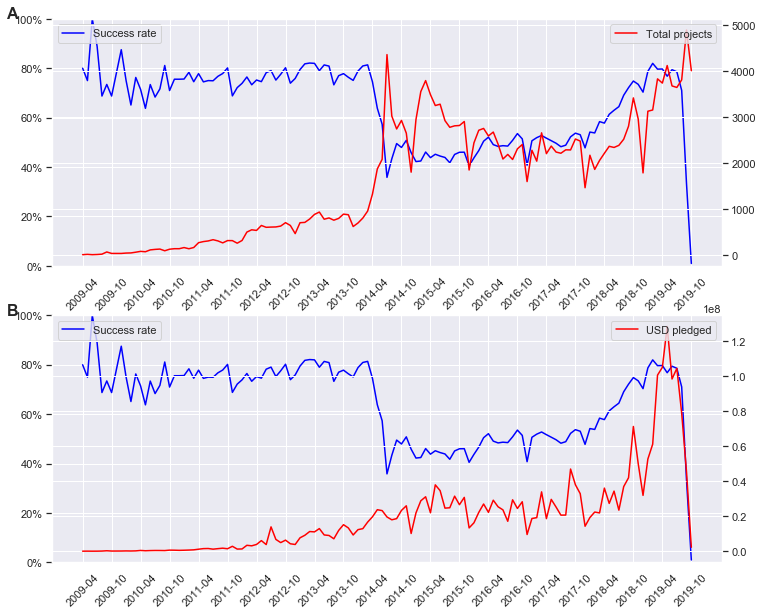

In [19]:
fig, (ax1, ax3) = plt.subplots(2, figsize=(12,10), sharex=False)
ax1.plot(df_by_month.success_ratio, color='blue', label='Success rate')
ax1.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(df_by_month.total, color='red', label='Total projects')
ax2.legend(loc=1)
ax1.set_xticks(df_by_month.index[::6])
ax1.text(-0.05, 1.05, 'A', transform=ax1.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax1.set_ylim(0,1)
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax1.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax3.plot(df_by_month.success_ratio,color='blue', label='Success rate')
ax3.legend(loc=2)
ax4 = ax3.twinx()
ax4.plot(df_lppm.successful, color='red', label='USD pledged')
ax4.legend(loc=1)
ax3.set_xticks(df_by_month.index[::6])
ax3.text(-0.05, 1.05, 'B', transform=ax3.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
ax3.set_ylim(0,1)
ax3.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax3.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)

Figure 3. Time series A) Success rate compared to total project counts B) success rate compared to USD pledged

From Figure 3A, we got a similar conclusion from Figure 2, that during 2014-July, there's a clear increase in total project number, but decrease in project success rate, and success rate gradualy increase and get closer to previous level (~80%) in 2019. From Figure 3B, we can get an important message that although success rate was decreased a lot by 2014-July, the actual total USD pledged is actually increased due to the total project number increase. This value is more important for company revenue compared to success rate. Total USD pledged number remain relative stable until 2018-Nov, which start to see large increase again.

In [21]:
df['duration'] = (df.deadline - df.launched_at) / np.timedelta64(1,'D')

In [22]:
df['usd_goal'] = df['goal'] * df['static_usd_rate']

In [24]:
df['fund_rate'] = df.usd_goal / df.duration
df['pledge_perc'] = df['usd_pledged'] / df['usd_goal']
df['year'] = df.launched_at.dt.strftime('%Y')
df['month'] = df.launched_at.dt.strftime('%m')

In [25]:
df_sf = df[np.logical_or(df.state == 'successful',df.state == 'failed')].copy()

In [26]:
df_sf.loc[:5,['launched_at', 'year', 'month']]

,launched_at,year,month
1,2013-07-29 14:40:26,2013,07
2,2013-08-23 19:58:57,2013,08
3,2018-08-01 08:27:55,2018,08
4,2013-05-06 14:43:05,2013,05
5,2015-05-07 13:21:57,2015,05


In [27]:
df_sf.columns

Index(['backers_count', 'blurb', 'country', 'country_displayable_name',
       'created_at', 'currency', 'currency_symbol', 'deadline',
       'disable_communication', 'goal', 'id', 'is_starrable', 'launched_at',
       'name', 'pledged', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'usd_pledged', 'main_cat',
       'sub_cat', 'loc_name', 'loc_state', 'creator_id', 'creator_name',
       'duration', 'usd_goal', 'fund_rate', 'pledge_perc', 'year', 'month'],
      dtype='object')

In [28]:
df_num = df_sf.loc[:, ['backers_count', 'usd_goal', 'usd_pledged', 'duration', 'fund_rate', 'pledge_perc', 'state']].copy()
df_num.head(5)

,backers_count,usd_goal,usd_pledged,duration,fund_rate,pledge_perc,state
1,39,1000.0,3485.0,33.262894,30.063530,3.485000,successful
2,42,3500.0,3575.0,60.000000,58.333333,1.021429,successful
3,21,5500.0,5523.0,33.230613,165.510035,1.004182,successful
4,1,9000.0,100.0,60.000000,150.000000,0.011111,failed
5,1,15000.0,50.0,30.000000,500.000000,0.003333,failed


In [29]:
df_cat = df_sf.loc[:,['country','country_displayable_name', 'currency', 'state', 'main_cat', 'sub_cat', 'loc_name', 'loc_state', 'year', 'month', 'spotlight', 'staff_pick']].copy()
df_cat.head()

,country,country_displayable_name,currency,state,main_cat,sub_cat,loc_name,loc_state,year,month,spotlight,staff_pick
1,US,the United States,USD,successful,music,Metal,Cleveland Heights,OH,2013,07,True,False
2,US,the United States,USD,successful,music,Jazz,Buffalo,NY,2013,08,True,False
3,US,the United States,USD,successful,art,Mixed Media,Manhattan,NY,2018,08,True,False
4,US,the United States,USD,failed,music,Jazz,Hollywood,CA,2013,05,False,False
5,US,the United States,USD,failed,publishing,Academic,Los Angeles,CA,2015,05,False,False


# Plot 5: Numeric analysis 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020ACC8FCEF0>,
      dtype=object)

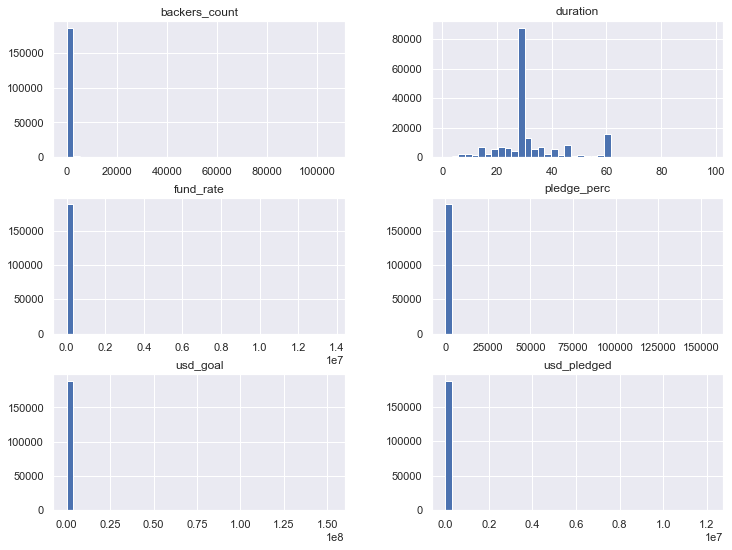

In [30]:
df_num.hist(figsize=(12,9), bins=40)

Quick histgram check for all numeric column distribution condition. The result is not very clear because some column have some far off outliers.I think use probablity plot could shows distribution clearer

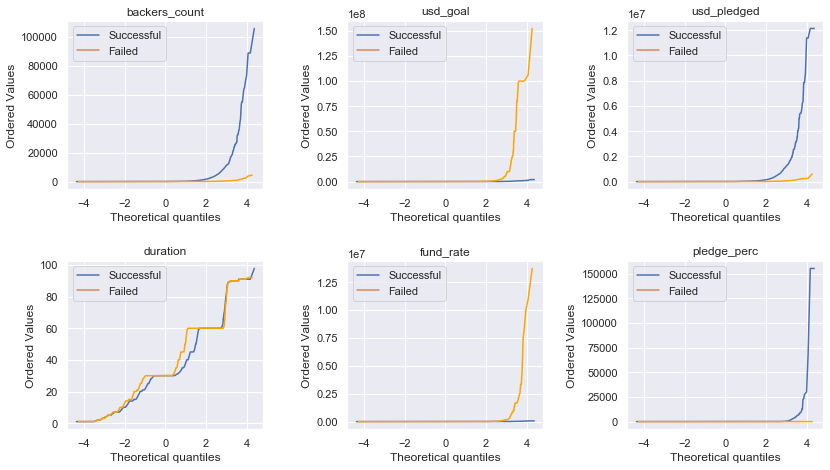

In [31]:
from scipy import stats

fig, axs = plt.subplots(2, 3, figsize=(12,7))
suc = df_num[df_num.state=='successful']
fai = df_num[df_num.state=='failed']
for i, var in enumerate(df_num.columns[:-1]):
    ax = axs[i//3, i%3]
    ax.plot(*stats.probplot(suc.iloc[:, i], fit=False), label='Successful')
    ax.plot(*stats.probplot(fai.iloc[:, i], fit=False), label='Failed')
    ax.legend()
    ax.set_xlabel('Theoretical quantiles')
    ax.set_ylabel('Ordered Values')
    ax.get_lines()[0].set_color('b')
    ax.get_lines()[1].set_color('orange')
    ax.set_title(var)
fig.tight_layout(pad=2)

Figure 4. Probability plots for numeric columns

Probability plot shows why for most numeric columns, histogram is not working.For most of the columns data, there's a very large range but most of the data (within 2 standard deviation, around 97%) are much small compared to the large data.Some interesting observation here is for fund rate and fund goal, failed projects tend to require higher amount and fund rate, which indicate it's more difficult for them to reach goal within target time. As for duration, there's no clear difference between successful and failed cases. 

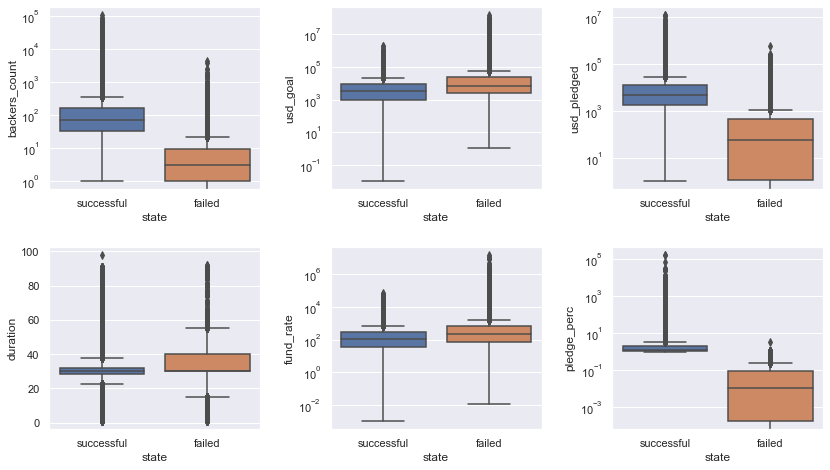

In [32]:
fig, axs = plt.subplots(2,3, figsize=(12,7))

for i, var in enumerate(df_num.columns[:-1]):
    ax = axs[i//3, i%3]
    sns.boxplot(x='state', y=var, data=df_num, ax=ax)
    if i !=3:
        ax.set_yscale('log')
    fig.tight_layout(pad=2)

Figure 5. Box plots for numeric columns

Probability plot successfully shows the position of outliers and how far they can go for different states, but it doesn't provide clear comparison due to majority of the data was too small compared to the large outlier. So we use box plot, and take log scale for some data to show clear comparison. From these box plots, we can get several interesting conclusion, such as successful projects have more backers compared to failed one. Failed case likely to set higher goal, and interestingly also like to require longer time for funding. While project with less fund request and shorter request time are more likely to be successful.  

In [33]:
def cdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y

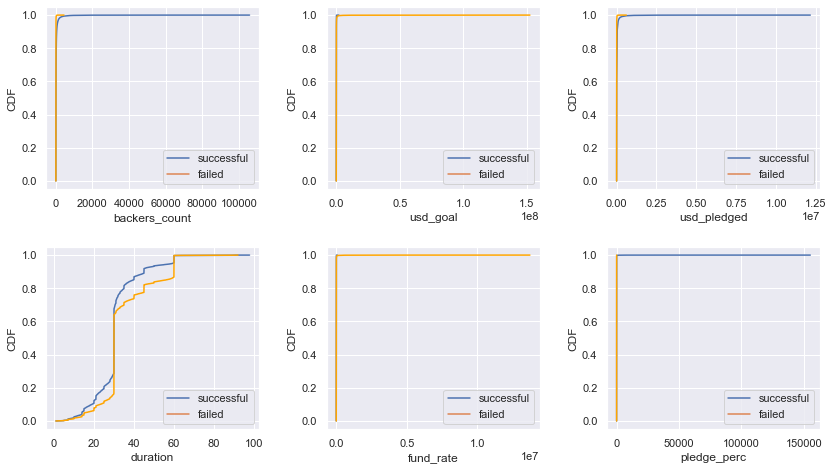

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(12,7))
suc = df_num[df_num.state=='successful']
fai = df_num[df_num.state=='failed']
for i, var in enumerate(df_num.columns[:-1]):
    ax = axs[i//3, i%3]
    x1, y1=cdf(suc.iloc[:, i])
    ax.plot(x1, y1, label='successful')
    x2, y2=cdf(fai.iloc[:, i])
    ax.plot(x2, y2, label='failed')
    ax.legend()
    ax.set_xlabel(var)
    ax.set_ylabel('CDF')
    ax.get_lines()[0].set_color('b')
    ax.get_lines()[1].set_color('orange')
fig.tight_layout(pad=2)

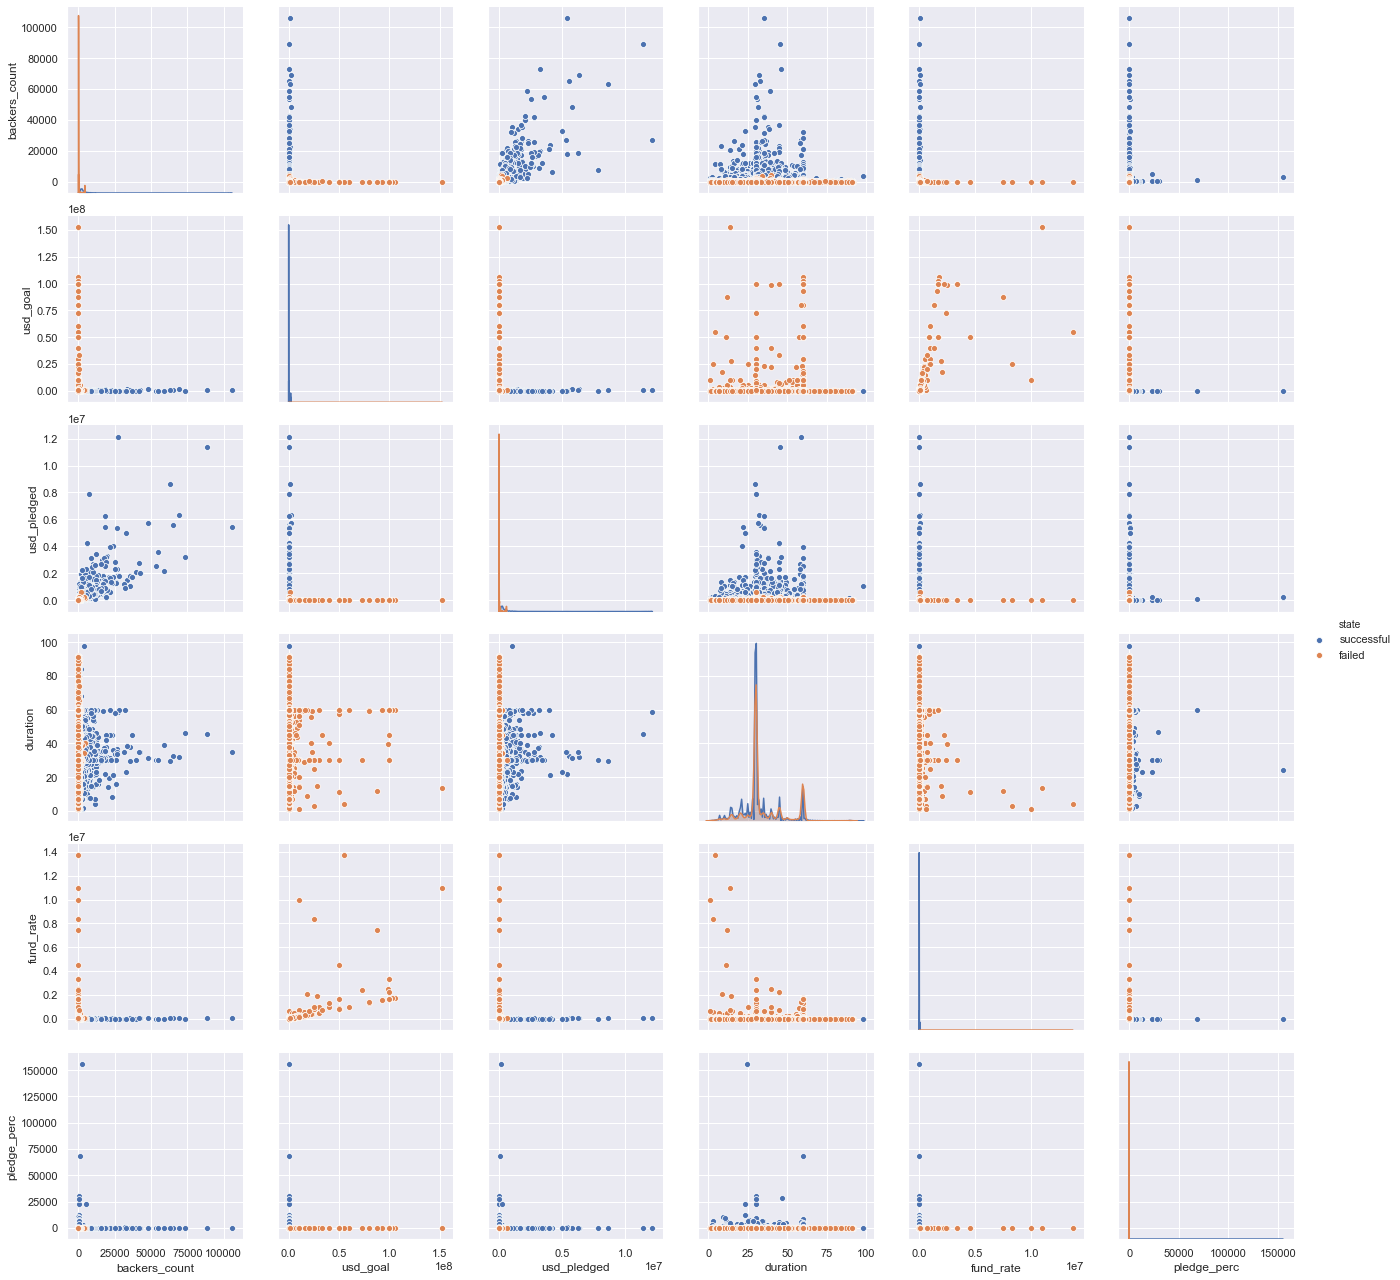

In [35]:
sns.pairplot(data=df_num, hue='state', height=3)

Seaborn paired plot, not very easy to draw conclusion due to wide data distribution.

# Plot 6: Category stack graph 

In [36]:
def cat_stack(x, y, data=df_cat, ax=ax):
    comparison = pd.crosstab(index=data[x], columns=data[y])
    if y=='state':
        comparison = comparison[['successful', 'failed']]
    comparison['total'] = comparison.sum(1)
    if x!='month':
        comparison = comparison.sort_values('total')
    ax.bar(list(comparison.index), comparison.iloc[:, 0], label='Successful')
    ax.bar(list(comparison.index), comparison.iloc[:, 1], bottom=comparison.iloc[:, 0], label='Failed')
    ax.legend()
    ax2 = ax.twinx()
    comparison['rate'] = comparison.successful / (comparison.failed + comparison.successful)
    ax2.plot(comparison.rate, color='r', marker='.')
    ax2.set_ylim(0,1)
    ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    ax2.set_ylabel('Success Rate', rotation=270)
    ax2.grid(False)

In [37]:
comparison = pd.crosstab(index=df_cat.staff_pick, columns=df_cat.state)
comparison['total'] = comparison.sum(1)
comparison = comparison.sort_values('total')
list(comparison.index)

[True, False]

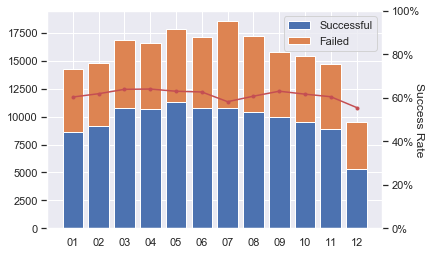

In [38]:
fig, ax = plt.subplots()
cat_stack('month', 'state', ax=ax)

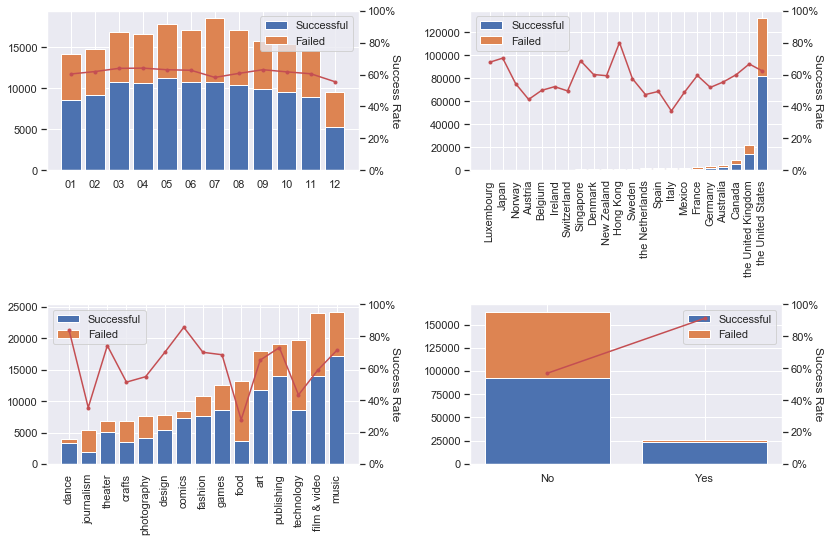

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
cat_stack('month', 'state', ax=axs[0,0])
cat_stack('country_displayable_name', 'state', ax=axs[0,1])
for tick in axs[0,1].get_xticklabels():
    tick.set_rotation(90)
cat_stack('main_cat', 'state', ax=axs[1,0])
for tick in axs[1,0].get_xticklabels():
    tick.set_rotation(90)
cat_stack('staff_pick', 'state', ax=axs[1,1])
axs[1,1].set_xticks([0, 1])
axs[1,1].set_xticklabels(['No', 'Yes'])
fig.tight_layout(pad=2)

Figure 6. Stack bar plot for category columns

We use stacked bar plot to analysis category columns. From this figure we can see December has smaller amount of project launched compared to other months, while July have the most. Interestingly, success rate was pretty stable but shows lowest at July and December, which are the months with most and least projects. For country distribution, most of the projects are from US, second place is UK, which only have around 1/6 of US project numbers. Third place is Canada, all other countries project number are much smaller compared to the top 3. 

In [40]:
df.to_csv('data/df_cleaned_2.csv')
df_num.to_csv('data/df_num.csv')
df_cat.to_csv('data/df_cat.csv')